# Сегментация пользователей банка (Segmentation of bank users)

## Описание проекта

Банк хочет удерживать и привлекать новых клиентов. Но привлекать новых клиентов дорого. Отдел маркетинга банка хочет разобраться, почему клиенты уходят и как их удержать. 

**Цель проекта:** на основе данных о клиентах банка дать рекомендации по их удержанию. Выделить однородные сегменты и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

**Задачи проекта:**

- провести исследовательский анализ данных,
- сегментировать пользователей на основе данных о количестве потребляемых продуктов,
- сформулировать и проверить статистические гипотезы,
- сделать выводы и дать рекомендации.
    
**Описание данных:**

Датасет содержит данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Даннны в таблице:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — балльная оценка имущества клиента,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет.

По итогам исследования была подготовлена презентация для руководства банка: <a href ="https://docs.google.com/presentation/d/124_QYDiKBbdLur19yl86p0093WgeQxJ3yk3bwUQp1XQ/edit?usp=sharing">презентация</a>

Также для отражения отточных клиентов в зависимости от количества продуктов был построен дашборд в Tableau Public: <a href ="https://public.tableau.com/app/profile/mikhail6624/viz/dash_final_project/dash?publish=yes">дашборд</a>

## Загрузка и предобработка данных

Импортируем библиотеки для дальнейшего исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from scipy import stats as st

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None 
pd.set_option('display.max_colwidth', -1, 'display.float_format', '{:.2f}'.format)

Загрузим данные

In [2]:
path = "https://drive.google.com/uc?export=download&id=1Q9_gSHSfe-AqwI3mLANe46jeS_CQMl8F"
df = pd.read_csv(path)
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,106217,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,113370,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
5,202305,856.00,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
6,177259,807.00,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
7,218868,825.00,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0
8,211686,923.00,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
9,133130,906.00,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0


Выведим общую информацию о данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


Выведим список характерных значений для каждого столбца

In [4]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,10000.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,162530.73,848.41,42.84,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,38965.78,65.80,12.13,1.98,1980614.15,0.80,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,128680.50,801.00,34.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,162577.50,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,196232.50,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Приведем названия столбцов к нижнему регистру и переименуем стобец с идентификатором пользователя

In [5]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid':'user_id'})
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Создадим функцию `describe_cols`, которая выведит список уникальных значений и их количество в каждом столбце и применим для таблицы

In [6]:
# функция для вывода списка и количества уникальных значений в таблице
def describe_cols(df):
    values = pd.DataFrame()
    for col in df.columns:
        values[col] = [sorted(df[col].unique()),df[col].nunique()]
    return values.transpose().sort_values(by = 1, ascending = True).rename(
        {0: 'Значения', 1: 'Количество уникальных значений'}, axis = 1)
describe_cols(df) # применение функции для таблицы 

,Значения,Количество уникальных значений
gender,"[Ж, М]",2
credit_card,"[0, 1]",2
last_activity,"[0, 1]",2
churn,"[0, 1]",2
city,"[Ростов, Рыбинск, Ярославль]",3
products,"[0, 1, 2, 3, 4, 5]",6
equity,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",10
age,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86]",68
score,"[642.0, 646.0, 648.0, 649.0, 650.0, 651.0, 652.0, 653.0, 654.0, 655.0, 656.0, 657.0, 658.0, 659.0, 660.0, 661.0, 662.0, 663.0, 664.0, 665.0, 666.0, 667.0, 668.0, 669.0, 670.0, 671.0, 673.0, 678.0, 680.0, 681.0, 682.0, 684.0, 685.0, 686.0, 687.0, 688.0, 689.0, 690.0, 691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 718.0, 719.0, 720.0, 721.0, 722.0, 723.0, 724.0, 725.0, 726.0, 727.0, 728.0, 729.0, 730.0, 731.0, 732.0, 733.0, 734.0, 735.0, 736.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 750.0, 751.0, 752.0, ...]",348
balance,"[0.0, 6.0, 7.0, 20.0, 22.0, 26.0, 33.0, 39.0, 40.0, 43.0, 48.0, 56.0, 73.0, 86.0, 178.0, 211.53, 239.0, 276.0, 798.27, 5750.92, 5899.36, 6739.19, 7703.05, 8126.88, 8881.01, 9253.18, 9753.01, 11978.32, 12946.78, 14674.32, 15017.21, 18965.1, 20374.1, 24074.1, 24268.13, 25253.54, 25293.25, 25354.23, 25642.42, 26312.31, 27030.33, 28374.75, 29565.79, 29863.64, 31111.2, 32711.67, 32762.47, 33699.39, 33756.72, 34279.88, 34502.21, 34864.89, 35867.0, 38269.74, 39712.83, 39795.57, 40290.02, 40479.76, 40513.48, 40863.85, 40899.29, 40939.74, 42626.98, 42997.07, 45655.38, 46417.33, 46466.74, 47055.0, 47287.92, 48755.96, 49974.61, 50468.8, 51051.41, 52184.31, 52394.8, 52723.23, 52778.19, 53735.61, 53754.14, 54155.57, 54809.19, 55381.92, 55817.81, 56907.01, 57184.38, 57405.67, 57601.18, 58490.35, 59214.82, 59442.77, 60536.59, 62137.02, 62504.47, 62889.53, 63222.73, 63271.41, 63589.24, 63670.9, 64058.15, 64471.65, ...]",7701


В таблице есть значения количества продуктов равное 0. Посмотрим, сколько их

In [7]:
df['products'].value_counts()

2    5108
1    3341
3    1046
4    474 
5    30  
0    1   
Name: products, dtype: int64

Такое значение одно. Выведим эту строку

In [8]:
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,100276,962.00,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Эта строка одна, клиент в оттоке, но у остальных клиентов в оттоке были продукты банка. Данная строку можно удалить, мы потеряем совсем незначительное количество информации, зато не будет лишней категории в столбце с продуктами.

In [9]:
df = df.drop(np.where(df['products'] == 0)[0])
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Проверим данные на явные дубликаты

In [10]:
print("Количество дубликатов: {}".format(df.duplicated(subset=['user_id']).sum()))             

Количество дубликатов: 17


Найдено 17 явных дубликатов. Посчитаем долю от общего числа значений

In [11]:
print("Доля дубликатов от общего количества записей: {:.2%}".format((df.duplicated().sum() / len(df))))

Доля дубликатов от общего количества записей: 0.01%


Так как доля очень мала, можно удалить одну строку, это совсем незначительно может исказить результат

In [12]:
df = df.drop_duplicates().reset_index(drop=True)
print("Количество дубликатов: {}".format(df.duplicated().sum())) 

Количество дубликатов: 0


Проверим данные на пропуски

In [13]:
print("Количество пропущенных значений: {}".format(df.isnull().sum().sum())) 

Количество пропущенных значений: 2293


Обнаружено 2293 пропущенных значений. Но Python показывает пустые значения только, если оно имеет тип **NoneType**. Необходимо проверить, есть ли другие пропуски в столбцах. Для этого создадим функцию `nan_values`.

In [14]:
# функция для вывода пропущенных значений
def nan_values(df,list_nans = ['',' ','""', '" "', None, np.nan]):
    list_count = []
    list_share = []
    for col in df.columns:
        list_count.append(sum(df[col].isin(list_nans)))
        list_share.append(round(sum(df[col].isin(list_nans)) * 100 / len(df), 2))
    missing_value_df = pd.DataFrame({'column_name': df.columns, 'num_missing': list_count, 'percent_missing': list_share})
    return missing_value_df
nan_values(df) # применение функции для таблицы 

,column_name,num_missing,percent_missing
0,user_id,0,0.00
1,score,0,0.00
2,city,0,0.00
3,gender,0,0.00
4,age,0,0.00
5,equity,0,0.00
6,balance,2293,22.93
7,products,0,0.00
8,credit_card,0,0.00
9,last_activity,0,0.00


Никаких других пропусков не обнаружено. Стоит проанализировать столбец `balance`

In [15]:
df_0 = df[df['balance'].isnull()]
df_0

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906.00,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927.00,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921.00,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922.00,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9974,208085,876.00,Ростов,М,38,0,NaN,1,1,0,171763.69,0
9982,125941,729.00,Ярославль,Ж,42,0,NaN,1,1,1,687538.70,0
9991,219924,884.00,Рыбинск,Ж,36,0,NaN,1,1,1,169844.88,0
9994,139170,894.00,Ярославль,М,46,0,NaN,1,1,0,196898.29,0


Посмотрим, есть ли какая-то закономерность в пропущенных значениях. Сравним среднюю зарплату клиентов, у которых не указан баланс, с теме, у кого он указан 

In [16]:
print('Средняя зарплата клиентов, у которых не указан баланс на счете: ', df_0['est_salary'].mean())

Средняя зарплата клиентов, у которых не указан баланс на счете:  226330.1334539906


In [17]:
df_not_0 = df[df['balance'].notnull()]
print('Средняя зарплата клиентов, у которых указан баланс на счете: ', df_not_0['est_salary'].mean())

Средняя зарплата клиентов, у которых указан баланс на счете:  124501.87236599639


Видим, что отличия значительные. Посмотрим на другие столбцы

In [18]:
for col in df_0[['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']]:
    display(df_0.groupby(col)['user_id'].count())

city
Ростов       239 
Рыбинск      577 
Ярославль    1477
Name: user_id, dtype: int64

gender
Ж    1011
М    1282
Name: user_id, dtype: int64

equity
0    2179
1    114 
Name: user_id, dtype: int64

products
1    1949
2    315 
3    29  
Name: user_id, dtype: int64

credit_card
0    422 
1    1871
Name: user_id, dtype: int64

last_activity
0    1032
1    1261
Name: user_id, dtype: int64

churn
0    2281
1    12  
Name: user_id, dtype: int64

По полученным данным можно сказать, что отсутствует значение в столбце `balance` в основном у неушедших клиентов, которые пользуются одним продуктом в банке, чаще всего - это кредитная карта. При этом балльная оценка имущества у таких клиентов в большинстве самая низкая (0). Половина таких клиентов проживают в Ярославле, чуть больше мужчин, но незначительно. Активными в последний месяц была половина.

Из всего вышесказанного можно предположить, что клиенты, у которых не указан баланс, не имеют дорогостоюшего имущества, возможно, снимают квартиру, пользуются только кредитной картой, но при этом имеют высокую зарплату, но из-за оплаты жилья и других расходов не имеют средств на счету банка.

Т.к. нет дополнительных данных и мы не можем быть уверены, что предположение полностью верно, оставим эти значения без изменений.

Для того, чтобы применять среднее и смотреть корреляции необходимо сделать значения пола и города числовыми. Сделаем при помощи pandas.get_dummies дополнительные столбцы

In [19]:
df = df\
        .join(pd.get_dummies(df.city))\
        .join(pd.get_dummies(df.gender))
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
0,106217,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,113370,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,120553,814.00,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9994,139170,894.00,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,0,0,1,0,1
9995,115639,903.00,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,0,0,1,0,1
9996,148700,777.00,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


## Исследовательский анализ данных

### Анализ признаков по группам

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (1 - те, кто ушел и 0 - те, кто остался)

In [20]:
df_group = df.groupby('churn').agg('mean').T
df_group['proc'] = (df_group[0]-df_group[1]) / df_group[1] * 100
df_group.sort_values(by = 'proc')

churn,0,1,proc
equity,2.37,3.76,-36.90
balance,734063.70,1133286.65,-35.23
last_activity,0.48,0.70,-31.19
М,0.47,0.65,-28.09
products,1.76,2.38,-25.93
Ярославль,0.59,0.62,-4.96
Ростов,0.14,0.15,-3.80
score,845.06,863.36,-2.12
est_salary,147764.05,148267.60,-0.34
age,43.16,41.38,4.29


Составим предположения о клиентах, ушедших в отток:

* уходят больше мужчин, а остаются клинтами примерно поровну;
* активность в последней месяц у ушедших клиентов выше; это можно объяснить тем, что перед закрытием всех продуктов, люди выводят средства;
* кредитной картой пользовались чуть больше половины ушедших, а 71% используют карту среди тех, кто остался;
* баланс ушедших в полтора раза больше, чем у оставшихся;
* ушедшие пользуются 2-3 продукатами, оставшиеся 1-2 продуктами;
* оценка собственности у ушедших значительно выше, чем у оставшихся;
* возраст ушедших на 2 года ниже, чем у оставшихся, 41 против 43;
* по соотнешинию между горолами особых различий нет.



### Гистограммы признаков

Разделим исходный датасет на 2 по признаку оттока `churn`. Построим гистограммы по всем признакам, где наглядно будет видно сравнение двух групп. Разделим все признаки на количественные и категориальные

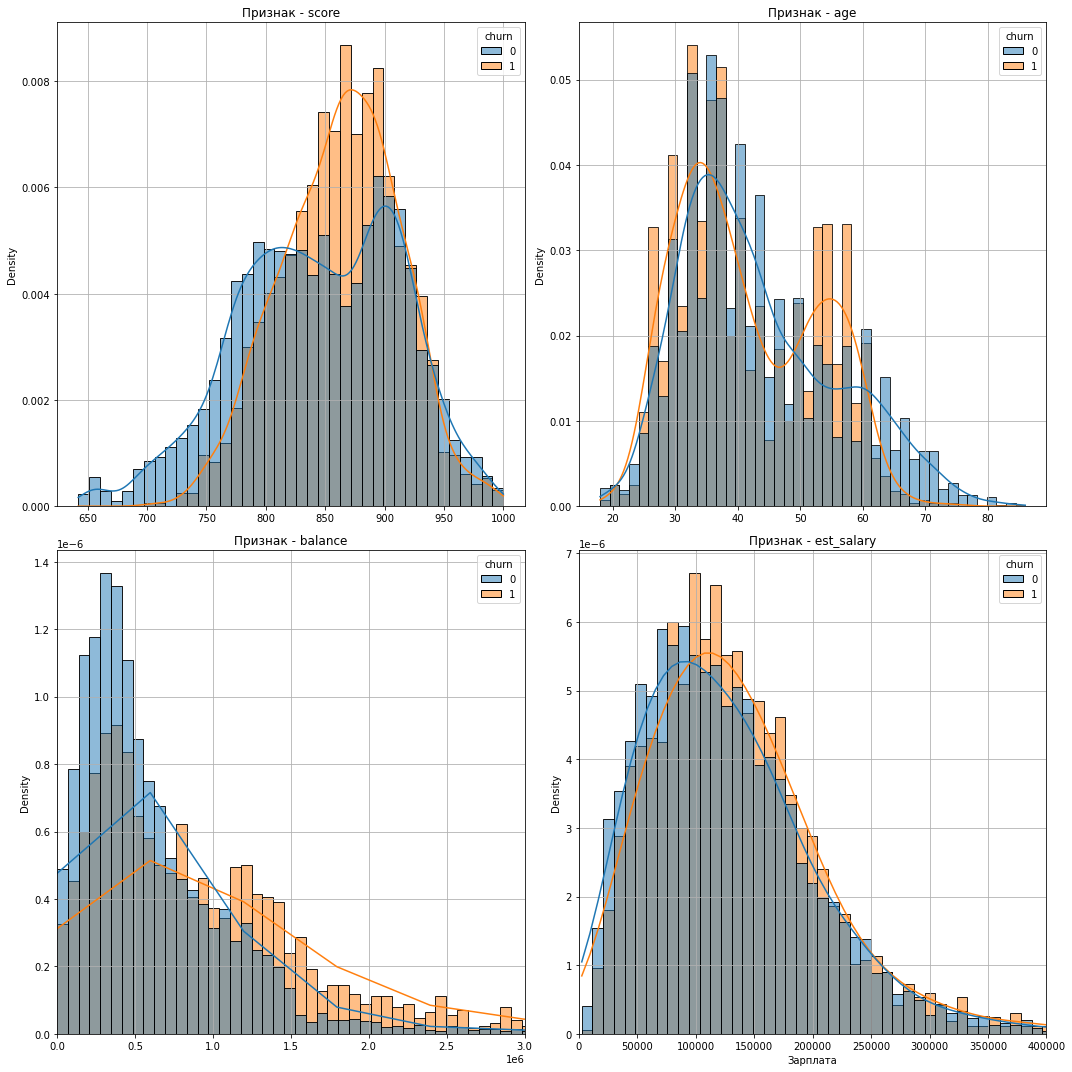

In [21]:
# Выделим количественные признаки;
# делаем новый холст, в котором графики будут в 2 столбца, а число строк - количество признаков деленное на 2

stack = ['score', 'age', 'balance', 'est_salary']

number_row = int(len(stack)/2)
fig, ax = plt.subplots(nrows=number_row, ncols=2, figsize=(15, 15))

# вытягиваем в один ряд
ax = ax.flatten() 

for i in range(len(stack)):
    sns.histplot(df, hue='churn', x=stack[i], ax=ax[i], stat='density', common_norm=False, kde=True)
    ax[i].set_title(f'Признак - {stack[i]}')
    ax[i].set_xlabel('')
    ax[i].grid()
    ax[2].set_xlim([0, 3000000])
    ax[3].set_xlim([0, 400000])
    ax[3].set_xlabel('Зарплата')

# полное отображение записей    
fig.tight_layout()
fig.show()

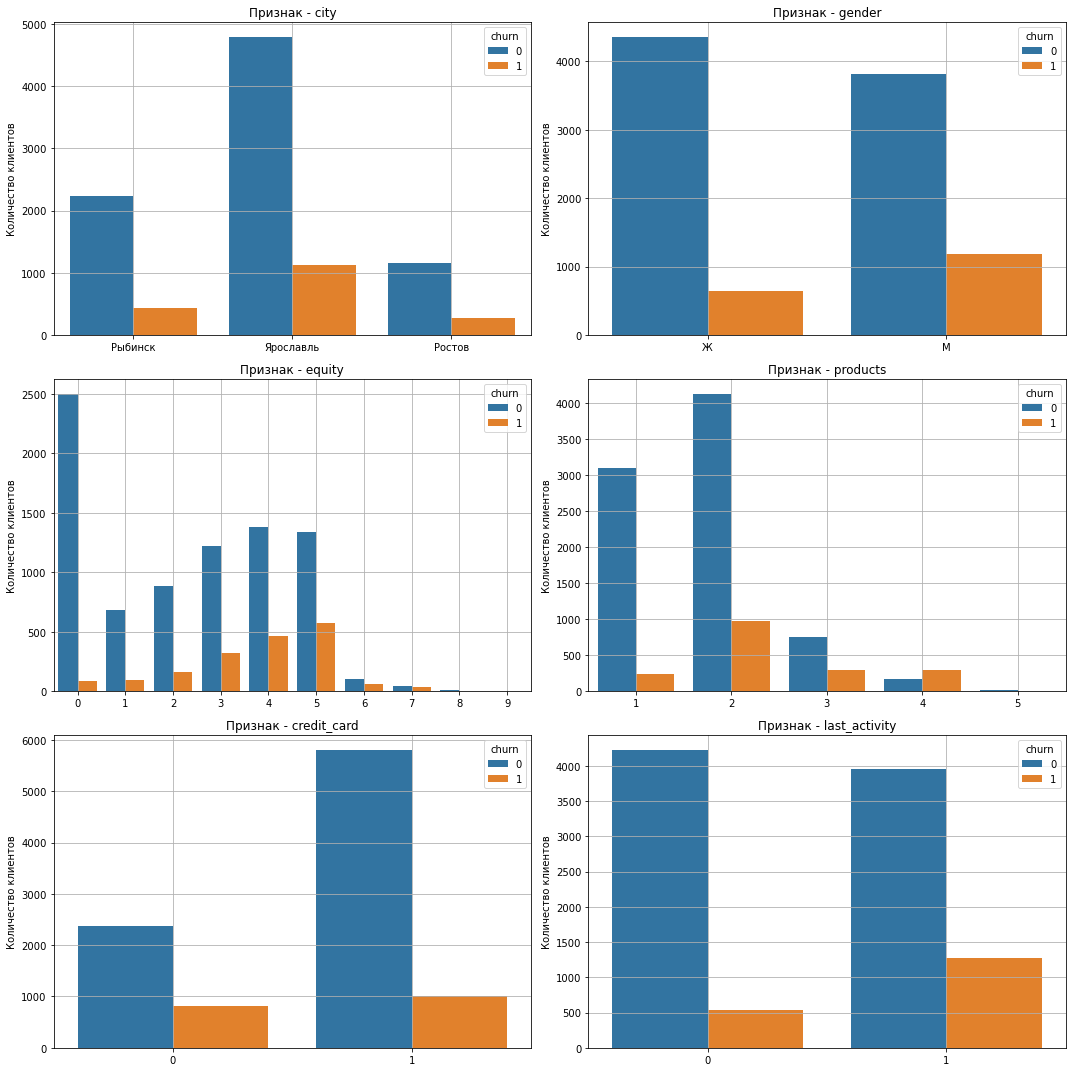

In [22]:
# Выделим категориальные признаки;
# делаем новый холст в котором графики будут в 2 столбца, а число строк - количество признаков деленное на 2

count = ['city', 'gender', 'equity', 'products', 'credit_card','last_activity']

number_row = int(len(count)/2)
fig, ax = plt.subplots(nrows=number_row, ncols=2, figsize=(15, 15))

# вытягиваем в один ряд
ax = ax.flatten() 

for i in range(len(count)):
    sns.countplot(x=count[i], data=df, hue='churn', ax=ax[i])
    ax[i].set_title(f'Признак - {count[i]}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Количество клиентов')
    ax[i].grid()
    
# полное отображение записей    
fig.tight_layout()
fig.show()

Построим для наглядности еще круговые диаграммы.

Т.к. значений в `equity` больше 5 мало, можно объединить их. Созададим отдельный столбец `equity_union`, в котором объединим значения больше 5, все эти значения будут обозначаться как 6.
Аналогично, объединим значения 4 и 5 в столбце `products` для удобства отображения, т.к. значений 5 мало. Созададим отдельный столбец `products_union`.

In [23]:
df['equity_union'] = df['equity']
df.loc[(df.equity_union > 5), 'equity_union'] = 6
df['products_union'] = df['products']
df.loc[(df.products_union > 3), 'products_union'] = 4

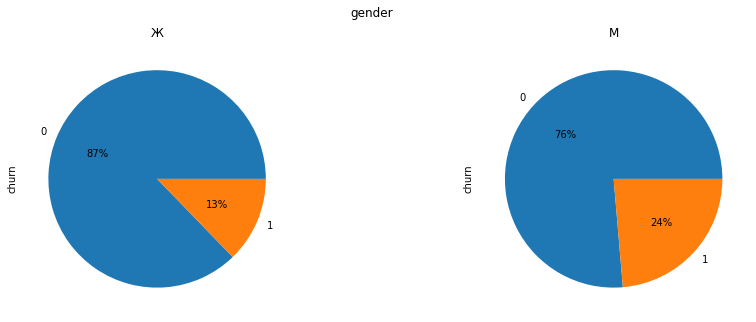

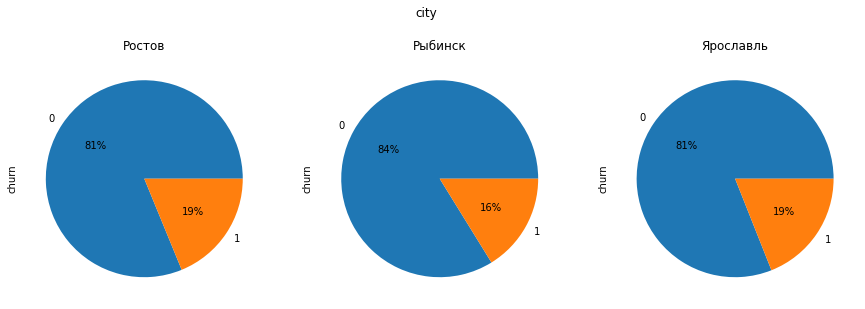

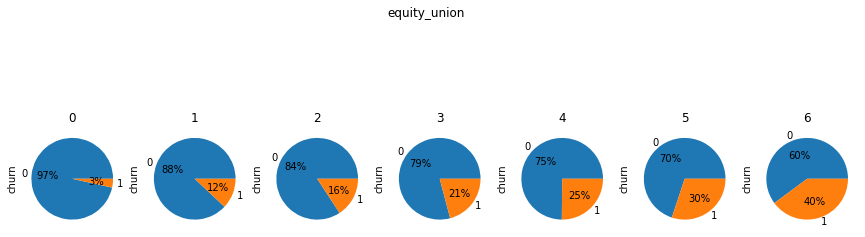

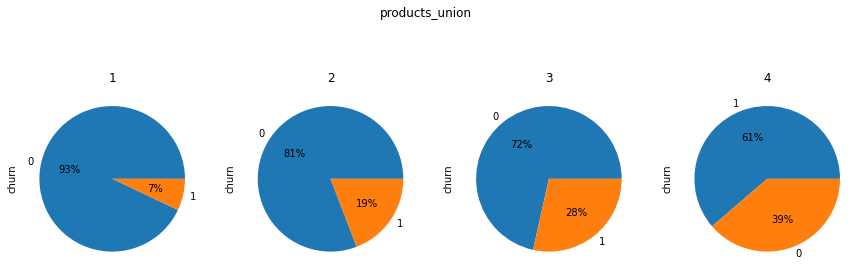

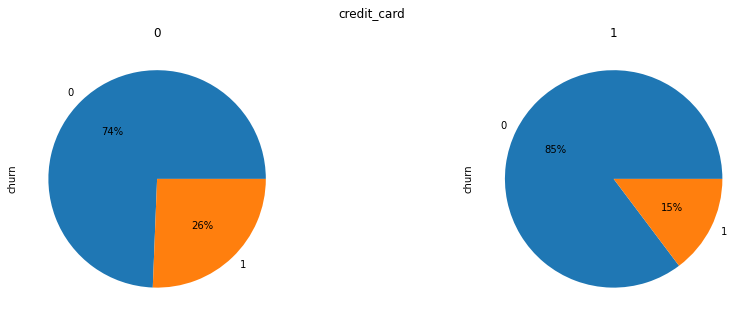

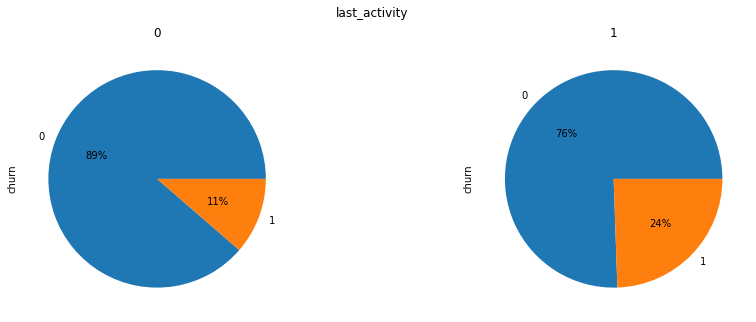

In [24]:
# функция для круговых диаграмм
def plot_pies(df, col):
    elements = sorted(df[col].unique())
    fig, axs = plt.subplots(1, len(elements), sharey=False, figsize=(15,5))
    for i, element in enumerate(elements):
        df.query(f"{col} == @element")['churn'].value_counts().plot(kind="pie", ax=axs[i], autopct='%1.0f%%').set(title=element)
    plt.suptitle(col)
plot_pies(df,"gender")
plot_pies(df,"city")
plot_pies(df,"equity_union")
plot_pies(df,"products_union")
plot_pies(df,"credit_card")
plot_pies(df,"last_activity")

В дополнении к выводам из предыдущего раздела можно добавить:

* распределения по параметру `score` для отточных и оставшихся клиентов очень похожи;
* по возрасту можно выделить у обоих групп пик около 35 лет, а также около 55 лет, но у оотточных он значительнее, это стоит отметить;
* распределения по `balance` похожи, за исключением большого количества нулевых или пропущенных значений;
* по городам можно выделить, что пропорционально распределены ушедшие относительно оставшихся в каждом населенном пункте;
* заметно больше уходят мужчин, о чем говорилось ранее;
* по оценке собственности: клиентов выше 5 в качестве оценки очень мало, при этом с увеличением оценки и увеличивается количество уходящих;
* в целом больше всего уходят клиентов, имеющих 2 продукта, но стоит заметить, что относителньо оствашихся выделяются с 4 продуктами, их уходят больше, чем остаются.

### Матрица корреляций

Построим матрицу корреляций

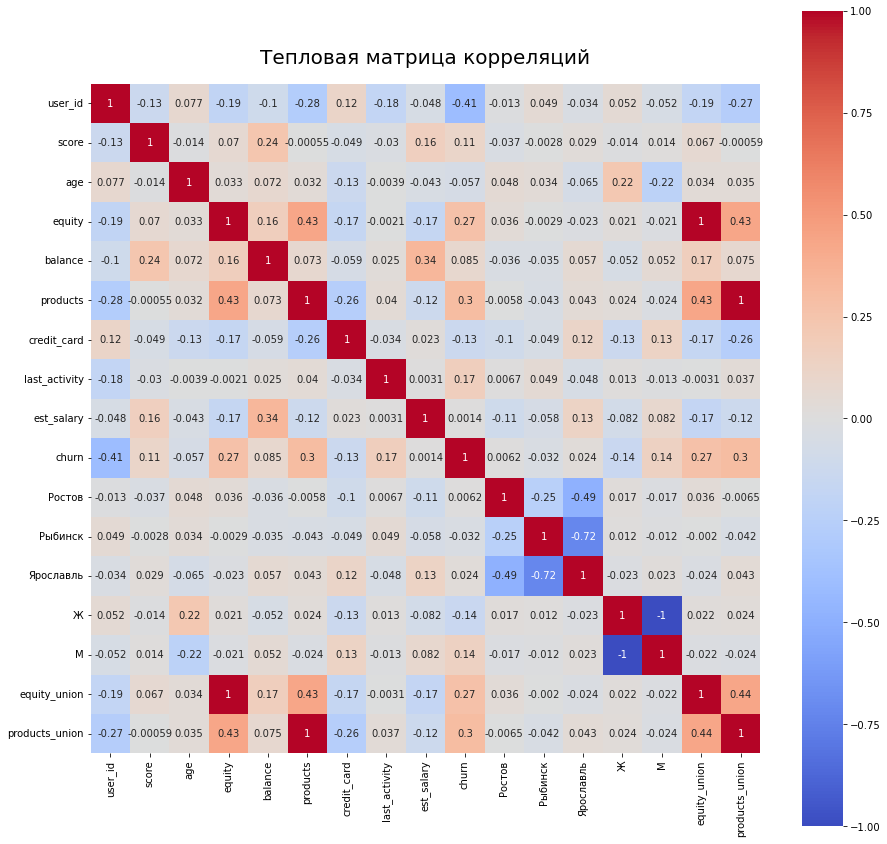

In [25]:
corr_m = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True, vmin = -1, vmax = 1, cmap='coolwarm', fmt='.2g')
plt.title('Тепловая матрица корреляций', fontsize=20, pad=20)
plt.show()

Проанализируем матрицу корреляций. Признаков, сильно коррелирующих (линейно) с фактом оттока `churn` нет, максимум: 0.3 с количеством продуктов `products` (`user_id` - нет смысла учитывать). С `products` линейно коррелирует также оценка собственности `equity`.

## Сегментация пользователей на основе количества продуктов

### Анализ пользователей по количеству продукта

Посмотрим на средние значения признаков в группировке по количеству продуктов

In [26]:
products_mean = df.groupby('products').mean()
products_mean.T.style.background_gradient(axis=1).set_precision(2)

products,1,2,3,4,5
user_id,170273.77,163149.51,162782.56,104695.48,102891.77
score,853.53,844.51,837.38,878.27,849.03
age,41.83,43.17,45.92,39.78,36.87
equity,1.33,3.15,3.52,4.15,3.60
balance,610823.76,814500.53,993294.02,1267820.57,449041.88
credit_card,0.87,0.63,0.35,0.68,0.63
last_activity,0.53,0.52,0.42,0.79,0.90
est_salary,180670.82,130608.39,128243.45,148788.95,100170.17
churn,0.07,0.19,0.28,0.63,0.30
Ростов,0.13,0.16,0.09,0.15,0.20


Посмотрим на количество ушедших клиентов и их долю по каждой группе

In [27]:
products_churn = df.groupby('products_union').agg({'churn':['count','sum']})
products_churn.columns = ['Всего клиентов', 'Ушедшие клиенты']
products_churn['Доля ушедших'] = products_churn['Ушедшие клиенты']/products_churn['Всего клиентов']
products_churn

,Всего клиентов,Ушедшие клиенты,Доля ушедших
products_union,,,
1,3340,235,0.07
2,5108,979,0.19
3,1046,298,0.28
4,504,309,0.61


Построим диаграммы распределения признаков по количеству продуктов. Для категориальных признаков используем для визуализации столбчатые диаграммы, для количественных - график "ящик с усами" (выберим его, а не гистограммы, т.к. для 5 групп гистограммы не очень наглядны и понятны). 

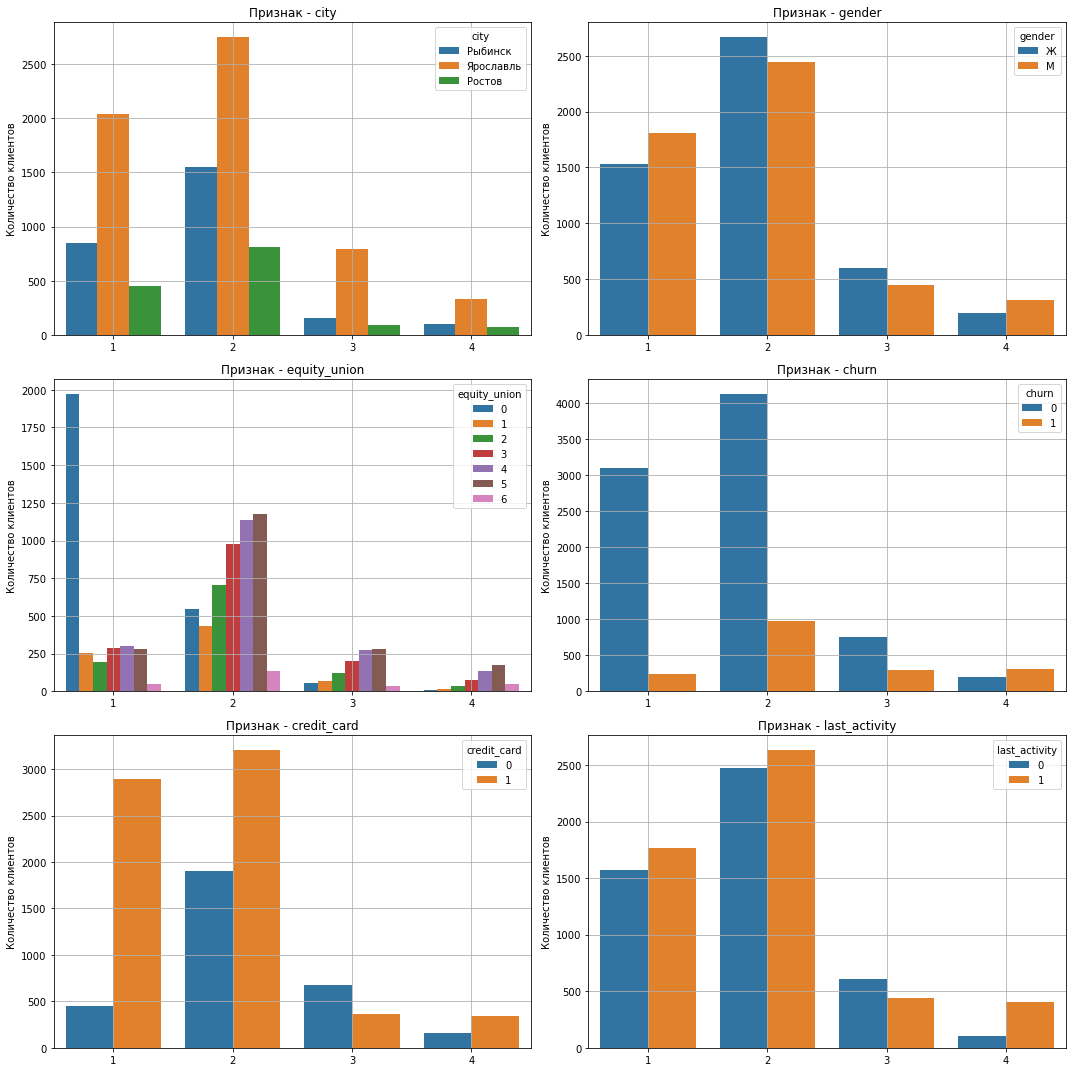

In [28]:
count = ['city', 'gender', 'equity_union', 'churn', 'credit_card','last_activity']

number_row = int(len(count)/2)
fig, ax = plt.subplots(nrows=number_row, ncols=2, figsize=(15, 15))

# вытягиваем в один ряд
ax = ax.flatten() 

for i in range(len(count)):
    sns.countplot(x='products_union', data=df, hue=count[i], ax=ax[i])
    ax[i].set_title(f'Признак - {count[i]}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Количество клиентов')
    ax[i].grid()
    
# полное отображение записей    
fig.tight_layout()
fig.show()

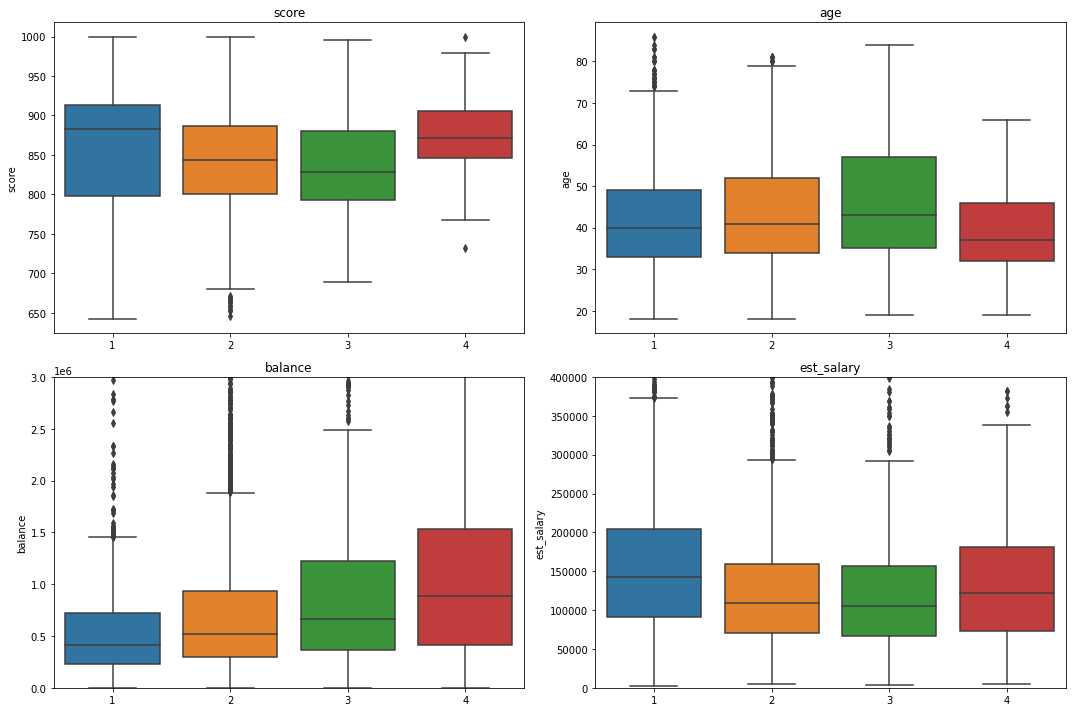

In [29]:
stack = ['score', 'age', 'balance', 'est_salary']

number_row = int(len(stack)/2)
fig, ax = plt.subplots(nrows=number_row, ncols=2, figsize=(15, 10))

# вытягиваем в один ряд
ax = ax.flatten() 

for i in range(len(stack)):
    sns.boxplot(y = stack[i], x = 'products_union', data = df, ax=ax[i])
    ax[i].set_title(f'{stack[i]}')
    ax[i].set_xlabel('')
    ax[2].set_ylim([0, 3000000])
    ax[3].set_ylim([0, 400000])
    
# полное отображение записей    
fig.tight_layout()
fig.show()

Выбросы по признакам `balance` и `est_salary` мешают визуально оценивать, поэтому используем уже созданныю таблицу `df_balance`.

Проанализировав все данные, необходимо выделить сегменты. За основу выбираем признак количества продуктов `products`, т.к. он больше всего линейно коррелирует с оттоком, а также `equity` — балльная оценка имущества клиента. Разделим клиентов на 4 сегмента:

* **1 сегмент** - пользователи с 1 продуктом;
* **2 сегмент** - пользователи с 2 и 3 продуктами, которые имеют балльную оценку имущества `equity` меньше 3;
* **3 сегмент** - пользователи с 2 и 3 продуктами, которые имеют балльную оценку имущества `equity` больше 3;
* **4 сегмент** - пользователи с 4 и 5 продуктами.

Далее проанализируем каждый сегмент и выделим характерные для него признаки


### Анализ пользователей по выделенным сегментам

Создадим функцию для сегментации пользователей

In [30]:
def segment(row): # создание функции по условиям
    products = row['products']
    equity = row['equity']
    if products == 1:
        return 1 
    elif (products == 2 or products == 3) and equity < 4:
        return 2
    elif (products == 2 or products == 3) and equity > 3:
        return 3
    elif products == 4 or products == 5:
        return 4
df['segment'] = df.apply(segment, axis=1) # добавление нового столбца с применением функции
df['segment'].value_counts() # количество уникальных значений в столбце для проверки

1    3340
2    3109
3    3045
4    504 
Name: segment, dtype: int64

Посмотрим количество ушедших клиентов по сегментам и их долю от общего числа пользователей, а также на средние значения признаков

In [31]:
segment_churn = df.groupby('segment').agg({'churn':['count','sum']})
segment_churn.columns = ['Всего клиентов', 'Ушедшие клиенты']
segment_churn['Доля ушедших'] = segment_churn['Ушедшие клиенты']/segment_churn['Всего клиентов']
segment_churn

,Всего клиентов,Ушедшие клиенты,Доля ушедших
segment,,,
1,3340,235,0.07
2,3109,463,0.15
3,3045,814,0.27
4,504,309,0.61


In [32]:
segment_mean = df.groupby('segment').mean().T
segment_mean.T.style.background_gradient(axis=1).set_precision(2)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М,equity_union,products_union
segment,,,,,,,,,,,,,,,,,
1,170273.77,853.53,41.83,1.33,610823.76,1.00,0.87,0.53,180670.82,0.07,0.13,0.25,0.61,0.46,0.54,1.32,1.00
2,167347.60,829.61,43.70,1.83,520863.21,2.14,0.63,0.49,127185.01,0.15,0.15,0.28,0.57,0.54,0.46,1.83,2.14
3,158737.12,857.28,43.58,4.63,1140851.99,2.20,0.53,0.51,133291.34,0.27,0.14,0.27,0.58,0.52,0.48,4.59,2.20
4,104588.12,876.53,39.61,4.12,1219083.75,4.06,0.68,0.80,145894.98,0.61,0.15,0.20,0.65,0.38,0.62,4.06,4.00


Видим, что 1, 2, 3 сегменты включают в себя близкое число клиентов, но есть заметное различие по оттоку. В 1 и 2 сегменте отток невысокий (7% и 15%, соответственно), а в 3 сегменте отток уже значительно выше (27%). 4 сегмент является самым немногочисленным, но он показателен именно высоким оттоком (61%).

Аналогично предыдущему разделу, построим распределения по признакам.

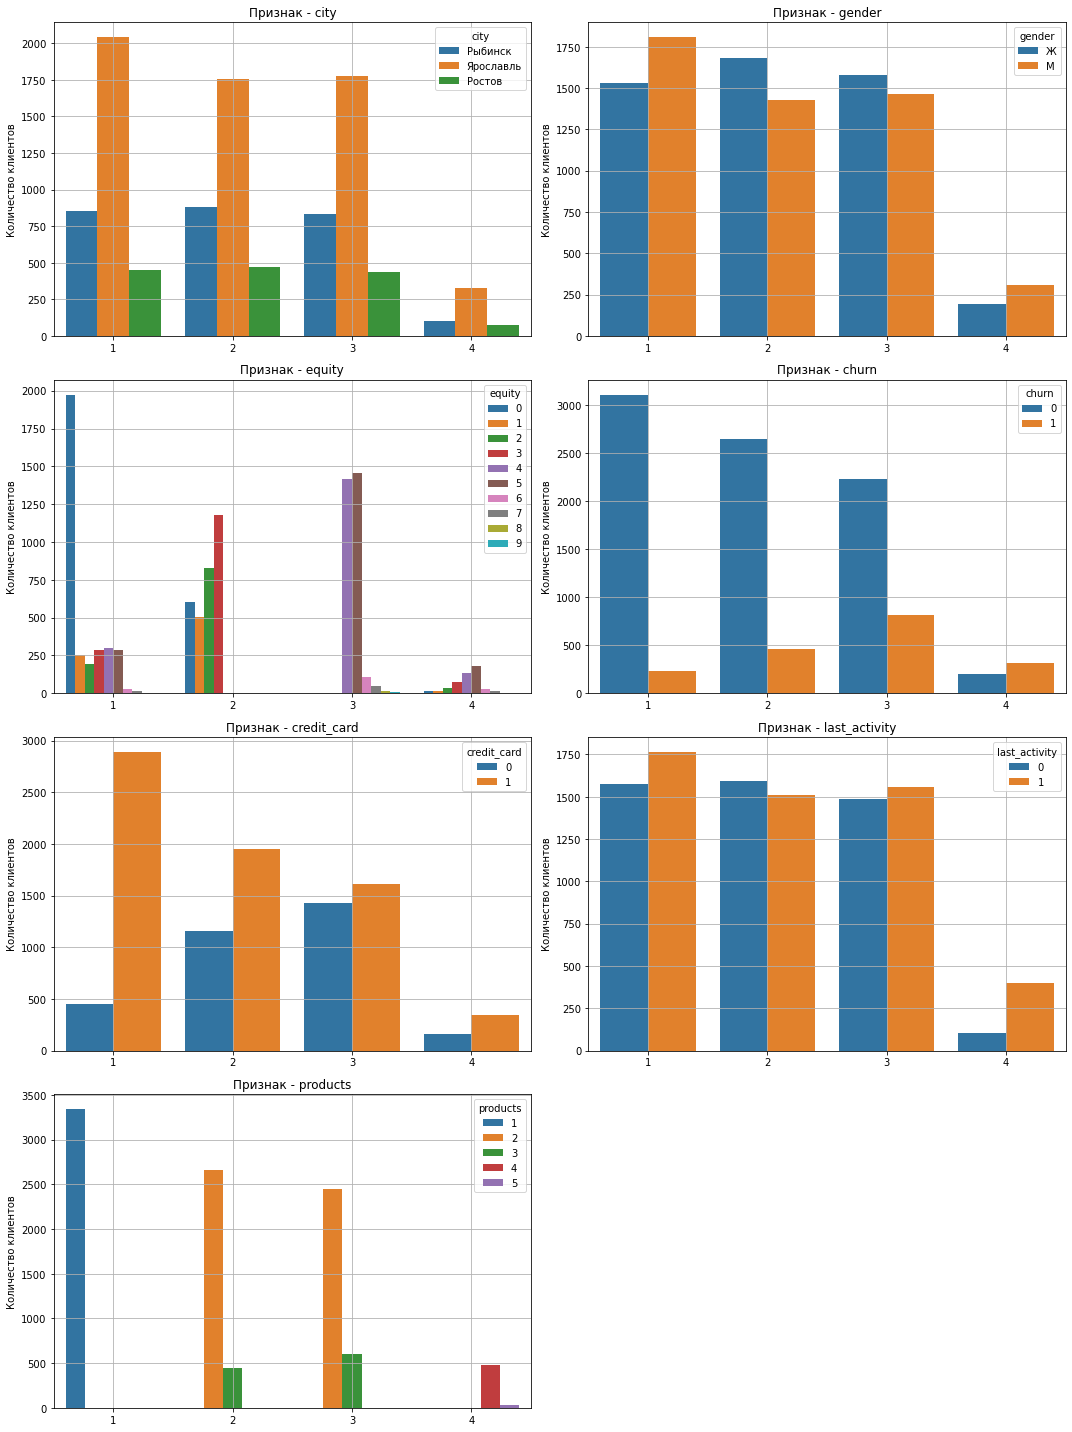

In [33]:
# Выделим категориальные признаки
count = ['city', 'gender', 'equity', 'churn', 'credit_card','last_activity', 'products']

number_row = 2
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# вытягиваем в один ряд
ax = ax.flatten() 

for i in range(len(count)):
#     sns.countplot(x=count[i], data=df, hue='products', ax=ax[i])
    sns.countplot(x='segment', data=df, hue=count[i], ax=ax[i])
    ax[i].set_title(f'Признак - {count[i]}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Количество клиентов')
    ax[i].grid()
    
# удаляем пустой график
fig.delaxes(ax[-1])
    
# полное отображение записей    
fig.tight_layout()
fig.show()

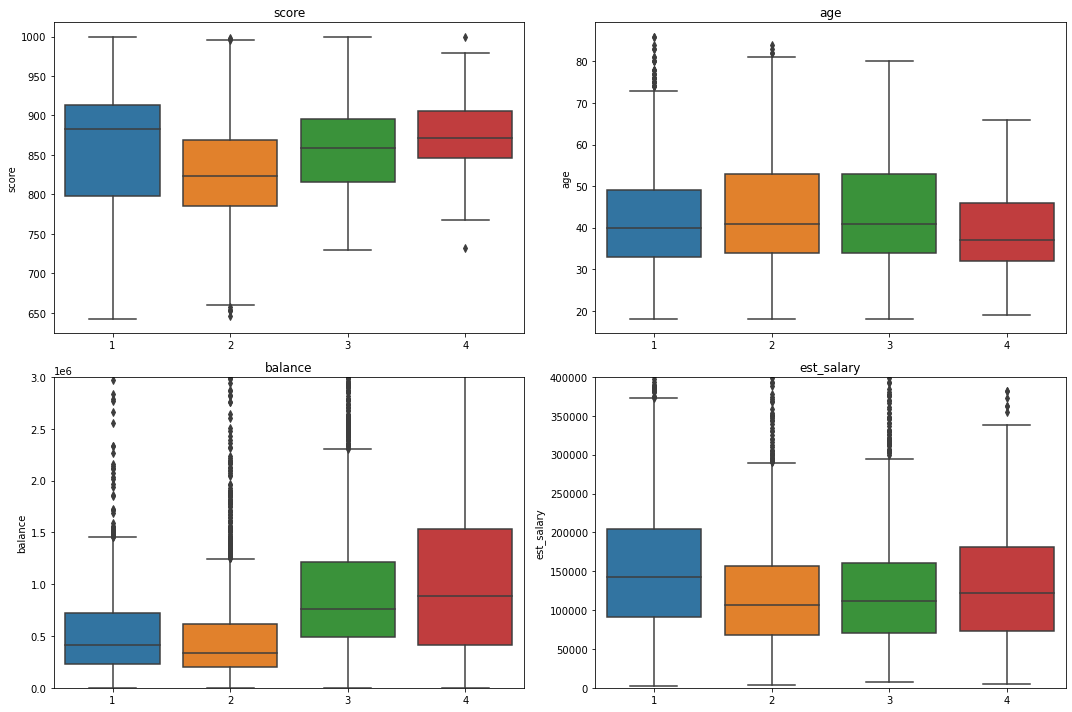

In [34]:
# Выделим количественные признаки
stack = ['score', 'age', 'balance', 'est_salary']

number_row = int(len(stack)/2)
fig, ax = plt.subplots(nrows=number_row, ncols=2, figsize=(15, 10))

# вытягиваем в один ряд
ax = ax.flatten() 

for i in range(len(stack)):
    sns.boxplot(y = stack[i], x = 'segment', data = df, ax=ax[i])
    ax[i].set_title(f'{stack[i]}')
    ax[i].set_xlabel('')
    ax[2].set_ylim([0, 3000000])
    ax[3].set_ylim([0, 400000])
    ax[i].set_xlabel('')
    
# полное отображение записей    
fig.tight_layout()
fig.show()

Составим портрет клиента каждого сегмента:

* **2 сегмент** - пользователи с 1 продуктом. Наиболее лояльные клиенты, лишь 7% ушедших, проживают в основном в Ярославле, чуть больше мужчин, возраст около 42 лет, имеют низкую оценку имущества около 1, 87% пользуются кредитной картой, имеют самую высокую зарплату;
* **2 сегмент** - пользователи с 2 и 3 продуктами, которые имеют балльную оценку имущества `equity` меньше 3, 15% ушедших, проживают в основном в Ярославле, больше женщин, 63% пользуются кредитными картами, средняя оценка имущества невысокая - 1.83, средний возраст около 44 лет, имеют самую низкую зарплату и баланс из всех сегментов;
* **3 сегмент** - пользователи с 2 и 3 продуктами, которые имеют балльную оценку имущества `equity` больше 3, процент оттока 27, больше половины проживают в Ярославле, половина имеет кредитные карты, средняя оценка имущества 4.63 (самая высокая), средний возраст 43 года;
* **4 сегмент** - пользователи с 4 и 5 продуктами, самые отточные клиенты 61%, самая малочисленная группа, 2/3 проживают в Ярославле, 2/3 пользуются кредитными картами, мужчин значительно больше 62%, имеют самый высокий баланс на счете, средний возраст 40 лет, средняя оценка имущества 4.12, высокая активность в последний месяц, т.к. много отточных, закрывают счета.

## Гипотеза о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Для проверки гипотезы воспользуемся непараметрическим критерием **Манна-Уитни**, т.к. присутствуют выбросы, уровень статистической значимости `alpha` возьмем **5%**.

**Нулевая гипотеза**:

В доходах клиентов клиентов с 1 и 2 продуктами банка нет статистически значимой разницы.

**Альтернативная гипотеза**:

В доходах клиентов клиентов с 1 и 2 продуктами банка есть статистически значимая разница.

In [35]:
df_1 = df.query('products == 1')
df_2 = df.query('products == 2')

In [36]:
alpha = 0.05  #уровень статистической значимости

results = st.mannwhitneyu(df_1['est_salary'], df_2['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  1.5540814786372293e-77
Отвергаем нулевую гипотезу: разница статистически значима


Уровень значимости `p-value` значительно меньше 5%, т.е. отвергаем нулевую гипотезу об отсутствии статистически значимой разницы между доходами клиентов с 1 и 2 продуктами.

## Гипотеза о различии в оттоке между клиентами с менее 4 и более 3 баллами по оценке имущества

Такую гипотезу интересно проверить, потому что мы сегментировали клиентов в том числе по этому показателю.

Для проверки гипотезы воспользуемся непараметрическим критерием **Манна-Уитни**, уровень статистической значимости `alpha` возьмем **5%**.

**Нулевая гипотеза**:

Нет статистически значимой разницы в оттоке между клиентами с менее 4 и более 3 баллами по оценке имущества.

**Альтернативная гипотеза**:

Есть статистически значимая разницав оттоке между клиентами с менее 4 и более 3 баллами по оценке имущества.

In [37]:
df_3 = df.query('equity < 4')
df_4 = df.query('equity > 3')

In [38]:
alpha = 0.05  # уровень статистической значимости

results = st.mannwhitneyu(df_3['churn'], df_4['churn'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 



p-значение:  4.0582454839086684e-106
Отвергаем нулевую гипотезу: разница статистически значима


Уровень значимости `p-value` значительно меньше 5%, т.е. отвергаем нулевую гипотезу об отсутствии статистически значимой разницы в оттоке между клиентами с менее 4 и более 3 баллами по оценке имущества.

## Выводы и рекомендации

По проведенному анализу можно сделать следующие выводы и дать рекомендации:

* в данных были найдены пропуски в столбце `balance`. Их мы оставили без изменений, но дали предположение о таких клиентах. Они не имеют дорогостоюшего имущества, возможно, снимают квартиру, пользуются только кредитной картой, но при этом имеют высокую зарплату, но из-за оплаты жилья и других расходов не имеют средств на счету банка,
* исследовав матрицу корреляций, можно сделать вывод, что сильная линейная корреляция между признаками отсутствует. Есть слабая корреляция 0.3 между фактом оттока `churn` и количеством продуктов `products`. С `products` линейно коррелирует также оценка собственности `equity`. По этим признаками и произвели сегментацию клиентов,
* **сегмент 1** - пользователи с 1 продуктом. Наиболее лояльные клиенты, лишь 7% ушедших, проживают в основном в Ярославле, чуть больше мужчин, возраст около 42 лет, имеют низкую оценку имущества около 1, 87% пользуются кредитной картой, имеют самую высокую зарплату,
* **сегмент 2** - пользователи с 2 и 3 продуктами, которые имеют балльную оценку имущества `equity` меньше 3, 15% ушедших, проживают в основном в Ярославле, больше женщин, 63% пользуются кредитными картами, средняя оценка имущества невысокая - 1.83, средний возраст около 44 лет, имеют самую низкую зарплату и баланс из всех сегментов,
* **сегмент 3** - пользователи с 2 и 3 продуктами, которые имеют балльную оценку имущества `equity` больше 3, процент оттока 27, больше половины проживают в Ярославле, половина имеет кредитные карты, средняя оценка имущества 4.63 (самая высокая), средний возраст 43 года,
* **сегмент 4** - пользователи с 4 и 5 продуктами, самые отточные клиенты 61%, самая малочисленная группа, 2/3 проживают в Ярославле, 2/3 пользуются кредитными картами, мужчин значительно больше 62%, имеют самый высокий баланс на счете, средний возраст 40 лет, средняя оценка имущества 4.12, высокая активность в последний месяц, т.к. много отточных, закрывают счета,
* гипотезу об отсутствии разницы в доходе между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, отвергли, т.к. уровень значимости ниже выбранного 5%, 
* гипотезу об отсутствии разницы в оттоке между клиентами с менее 4 и более 3 баллами по оценке имущества также отвергли, т.к. уровень значимости ниже выбранного 5%. Проверку такой гипотезы мы выбрали из-за сегментирования пользователей по `equity`, 
* в качестве рекомендации для удержания клиентов можно предложить:   
    * **1 сегмент** - у клиентов высокая зарплата, но низкая оценка имущества, стоит предложить таким клиентам ипотеку с учетом достаточно выгодных условий последнее время;    
    * **2 сегмент** - клиенты с самой низкой зарплатой из всех и кредитная карта есть только у 63%, стоит предложить им карту рассрочки, чтобы покупки можно было растягивать на более длительный срок;  
    * **3 сегмент** - клиенты с высокой зарплатой, оценкой имущества, но при этом только половина имеет кредитные карты, стоит эту услугу предложить на выгодных условиях с хорошим кэшбеком, также стоит предложить продукты страхования имущества;  
    * **4 сегмент** - клиенты премиум класса, имеют много продуктов, но уходят в большом количестве, возможно, отдел привилегии плохо работает или вообще отсутсвует, а клиенты уходят в другие банки, чтобы получать такие услуги, также стоит предложить инвестиции в российские акции и рассказать про них более подробно, т.к. это одна из немногих сейчас возможность получение небольшой прибыли  